# task 2 :- svm classification

In [5]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

iris = load_iris(as_frame=True)
df = iris.frame

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Try different kernels

In [6]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svm = SVC(kernel=kernel, C=1.0, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Kernel: linear
Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Kernel: rbf
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Kernel: poly
Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1  

# Confusion matrix visualization

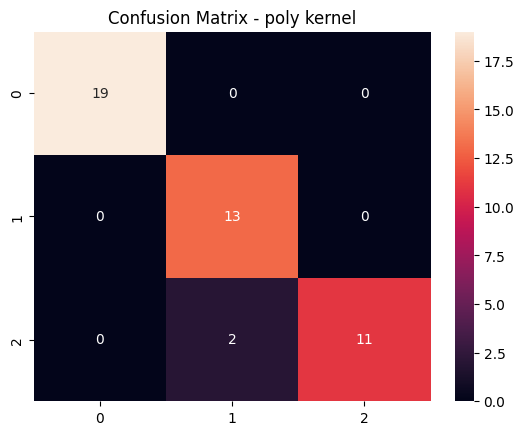

In [9]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'Confusion Matrix - {kernel} kernel')
plt.show()